In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import re
from collections import Counter

In [5]:
dir = 'C:/Users/Rodrigo/dados/'

In [6]:
train = pd.read_csv(dir + 'train.csv', sep=',',index_col=0, dtype={11:'str',12:'str'})

In [7]:
train.tail()

,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
id,,,,,,,,,,,,,,,
p014188,dd05465e8daad481c9be9e61e147c9cd,Mr.,NM,2016-10-07 16:13:32,Grades 6-8,Math & Science,Mathematics,Math is Fun!!,I currently teach math in a low-income school ...,Students seem to get board with math quickly a...,NaN,NaN,My students need a way to have fun while worki...,1,1
p116452,40762708f7589d161ae883dede98a6a1,Mr.,AZ,2017-03-11 23:58:31,Grades 9-12,Music & The Arts,Performing Arts,"\""Sew\"" you think you can design costumes!",My students are predominantly Hispanic and oft...,I was taken back earlier in the year when I br...,NaN,NaN,My students need this serger to make our costu...,0,1
p074761,3429d29ecba4a37ac5bd69ded4aab341,Mrs.,AZ,2017-02-09 15:42:43,Grades 6-8,Math & Science,"Applied Sciences, Environmental Science",Sustainable Classroom,I teach science to eighth graders at a suburba...,"With this project, students will be able to ma...",NaN,NaN,"My students need a vinyl machine, button maker...",48,0
p136737,497ba7027394d6490d2d2b34af2db5fd,Mrs.,FL,2016-12-28 14:20:07,Grades PreK-2,Literacy & Language,Literacy,Can I go to the library?,I work with a group of wonderful second grade ...,Have you ever went to the library to find a go...,NaN,NaN,My students need 3 shelf organizers to have a ...,29,1
p190772,337bc63eccf6f6ee26e727a1f18b80f4,Ms.,TX,2016-05-15 20:25:14,Grades 3-5,Literacy & Language,Literacy,Reader Leaders!,Balanced literacy was a mystery to me until a ...,"At the beginning of the school year, the readi...",My students will be able to listen to books re...,Donations to this project will help my student...,My students need a literacy listening center w...,1,1


In [8]:
test = pd.read_csv(dir + 'test.csv', sep=',',index_col=0, dtype={11:'str',12:'str'})
resources = pd.read_csv(dir + 'resources.csv', sep=',',index_col=0)

In [9]:
test.tail()

,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects
id,,,,,,,,,,,,,,
p183993,be39c3d9b26cbb91f20435ba45e8451e,Mrs.,AL,2017-04-07 07:48:40,Grades PreK-2,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",iPad Intelligence,I teach a diverse group of creative kindergart...,My students will use the Apple iPad mini durin...,NaN,NaN,My students need one iPad mini to enhance thei...,14
p116343,90957869296e26198b1f162f169f8a55,Ms.,NM,2017-04-25 17:46:26,Grades PreK-2,"Warmth, Care & Hunger","Warmth, Care & Hunger",Clean Clothes Center- Finishing the Cycle,Many of our families do not have access to was...,This clothes dryer will allow students that ha...,NaN,NaN,My students need a clothes dryer to supplement...,1
p210728,692376a473aaf753890e329081b5787c,Mrs.,CA,2017-04-17 17:53:12,Grades 6-8,Literacy & Language,"Literacy, Literature & Writing",Everyday Authors Among Us,My 6th grade students are a lively bunch of in...,"Every year, my 6th grade students write and pu...",NaN,NaN,My students need a variety of materials to use...,4
p060531,0fcaec76e9ea1730e81f2ca8eae5891b,Mrs.,OR,2017-04-19 12:11:59,Grades 3-5,"Warmth, Care & Hunger","Warmth, Care & Hunger",Coat Lockers for Our Classroom!,In our classroom students celebrate their indi...,"At this time, my students place their personal...",NaN,NaN,"My students need coat lockers, so they have a ...",9
p087783,d3fd1b7b0efff1eddbd3fbfe4c00711e,Mrs.,IN,2017-04-27 19:50:35,Grades 3-5,"Literacy & Language, Math & Science","Literacy, Mathematics",A Coffee Shop Classroom,I am a teacher in a Title 1 K-5 elementary sch...,I am gradually switching my classroom from tra...,NaN,NaN,My students need flexible seating arrangements...,0


In [10]:
resources.tail()

,description,quantity,price
id,,,
p031981,AmazonBasics 9 Volt Everyday Alkaline Batterie...,1,9.99
p031981,AmazonBasics AAA Performance Alkaline Batterie...,1,6.99
p031981,Black Electrical Tape (GIANT 3 PACK) Each Roll...,6,8.99
p031981,Flormoon DC Motor Mini Electric Motor 0.5-3V 1...,2,8.14
p031981,WAYLLSHINE 6PCS 2 x 1.5V AAA Battery Spring Cl...,2,7.39


In [11]:
print(test.columns,'\n',train.columns,'\n',resources.columns)

Index(['teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects'],
      dtype='object') 
 Index(['teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object') 
 Index(['description', 'quantity', 'price'], dtype='object')


In [12]:
train.groupby('project_subject_categories')['project_is_approved'].mean().sort_values(ascending = False)

project_subject_categories
Warmth, Care & Hunger                         0.921953
Health & Sports, Warmth, Care & Hunger        0.903226
History & Civics, Health & Sports             0.900000
Literacy & Language, History & Civics         0.890494
History & Civics, Literacy & Language         0.885490
Literacy & Language                           0.869858
Literacy & Language, Math & Science           0.867219
Music & The Arts, Special Needs               0.863830
Applied Learning, Literacy & Language         0.861208
Health & Sports, Special Needs                0.861064
Math & Science, Literacy & Language           0.861046
Literacy & Language, Applied Learning         0.859345
Math & Science, History & Civics              0.858326
Literacy & Language, Special Needs            0.854450
History & Civics, Math & Science              0.853333
Health & Sports, Applied Learning             0.851852
Music & The Arts                              0.850006
Health & Sports, Math & Science       

In [13]:
train.groupby(['project_subject_categories','project_subject_subcategories'])['project_is_approved'].mean().sort_values(ascending = False)

project_subject_categories               project_subject_subcategories             
Health & Sports, Applied Learning        Nutrition Education, Parent Involvement       1.000000
Applied Learning, Health & Sports        Character Education, Nutrition Education      1.000000
Math & Science, History & Civics         Environmental Science, Financial Literacy     1.000000
History & Civics, Music & The Arts       Economics, Music                              1.000000
Applied Learning, Health & Sports        Other, Team Sports                            1.000000
History & Civics, Music & The Arts       Financial Literacy, Performing Arts           1.000000
Health & Sports, Applied Learning        Gym & Fitness, Parent Involvement             1.000000
Literacy & Language, Applied Learning    Foreign Languages, Parent Involvement         1.000000
Applied Learning, Warmth, Care & Hunger  Parent Involvement, Warmth, Care & Hunger     1.000000
Applied Learning, Health & Sports        Parent Invo

In [14]:
resources['total'] = resources.quantity * resources.price
expenses = resources.groupby('id')['total'].sum()
expenses.head()

id
p000001     833.63
p000002     630.28
p000003     298.97
p000004    1126.22
p000005     702.31
Name: total, dtype: float64

In [16]:
number_of_items = resources.groupby('id')['total'].count()
number_of_items.head()

id
p000001     4
p000002    14
p000003     4
p000004    95
p000005     4
Name: total, dtype: int64

SyntaxError: invalid syntax (<ipython-input-17-08aba5d908a4>, line 1)

In [18]:
train2 = train.join(expenses)
train2 = train2.join(number_of_items,rsuffix='1')
train2.rename(columns={'total1':'qnty'}, inplace=True)
train2

,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total,qnty
id,,,,,,,,,,,,,,,,,
p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,899.94,2
p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,400.00,1
p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,469.99,1
p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,684.47,5
p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,711.00,1
p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Applied Learning, Literacy & Language","Character Education, Literature & Writing",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,I started a program called Telementoring in ho...,NaN,NaN,My students need tablets in order to communic...,0,1,727.36,2
p103285,4e156c5fb3eea2531601c8736f3751a7,Mrs.,MO,2016-08-31 00:30:43,Grades PreK-2,Health & Sports,Health & Wellness,Active Kindergartners,Kindergarten is the new first grade. My studen...,With balance discs and stools as flexible seat...,NaN,NaN,My students need stability stools and inflatab...,1,1,414.02,2
p181781,c71f2ef13b4bc91afac61ca8fd4c0f9f,Mrs.,SC,2016-08-03 13:26:01,Grades PreK-2,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",Fabulous Firsties-Wiggling to Learn!,First graders are fantastic! They are excited ...,First graders love learning! We need 6 wiggle-...,NaN,NaN,My students need wiggle stools to allow them t...,0,1,414.78,1
p114989,b580c11b1497a0a67317763b7f03eb27,Ms.,IN,2016-09-13 22:35:57,Grades 6-8,Math & Science,Mathematics,Wobble Chairs Help Fidgety Kids Focus,My seventh graders dream big. They can't wait ...,I have used alternative seating in my classroo...,NaN,NaN,My students need seating that allows the most ...,13,1,319.80,1


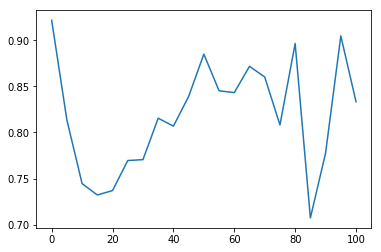

In [19]:
q = train2.groupby(round(train2['qnty']/5,0)*5)['project_is_approved'].mean()
plt.plot(q)

In [20]:
train2['project_is_approved'].astype(str)

id
p036502    1
p039565    0
p233823    1
p185307    0
p013780    1
p063374    1
p103285    1
p181781    1
p114989    1
p191410    1
p030093    1
p226941    1
p225747    1
p173555    0
p055350    1
p060293    1
p199435    1
p074849    1
p232007    1
p037127    0
p230221    1
p116615    1
p106275    1
p070918    1
p144291    1
p116102    1
p070029    1
p107356    1
p031939    1
p044085    1
          ..
p046158    1
p117186    1
p252101    1
p135316    0
p021728    1
p054114    1
p034326    1
p149979    1
p014629    1
p212015    0
p110625    1
p053417    1
p053967    1
p226452    0
p177332    1
p030914    1
p224932    1
p245029    1
p154340    0
p235466    1
p068185    0
p248714    1
p045565    1
p078709    0
p184627    1
p014188    1
p116452    1
p074761    0
p136737    1
p190772    1
Name: project_is_approved, Length: 182080, dtype: object

In [26]:
train2['project_essay_1'].astype(str).str.len()

id
p036502     967
p039565     587
p233823     761
p185307    1201
p013780     451
p063374     492
p103285     789
p181781     458
p114989     573
p191410     624
p030093     401
p226941     706
p225747     498
p173555     506
p055350     625
p060293     815
p199435     619
p074849    1146
p232007     292
p037127     544
p230221     653
p116615     508
p106275     780
p070918     733
p144291     649
p116102     688
p070029     942
p107356     562
p031939     731
p044085     482
           ... 
p046158     584
p117186     839
p252101     648
p135316     573
p021728     657
p054114     623
p034326     704
p149979     696
p014629     556
p212015     735
p110625     989
p053417    1247
p053967     300
p226452     106
p177332    1096
p030914     688
p224932     788
p245029     677
p154340     458
p235466     494
p068185     834
p248714     953
p045565     536
p078709     488
p184627     504
p014188     497
p116452     527
p074761     561
p136737     513
p190772     280
Name: project_essay_1

In [27]:
train2.values

array([['484aaf11257089a66cfedc9461c6bd0a', 'Ms.', 'NV', ..., 1, 899.94,
        2],
       ['df72a3ba8089423fa8a94be88060f6ed', 'Mrs.', 'GA', ..., 0, 400.0,
        1],
       ['a9b876a9252e08a55e3d894150f75ba3', 'Ms.', 'UT', ..., 1, 469.99,
        1],
       ...,
       ['3429d29ecba4a37ac5bd69ded4aab341', 'Mrs.', 'AZ', ..., 0, 721.07,
        9],
       ['497ba7027394d6490d2d2b34af2db5fd', 'Mrs.', 'FL', ..., 1, 237.92,
        1],
       ['337bc63eccf6f6ee26e727a1f18b80f4', 'Ms.', 'TX', ..., 1, 338.0,
        2]], dtype=object)

In [28]:
test.school_state

id
p233245    CA
p096795    SC
p236235    SC
p233680    IA
p171879    CA
p016071    CO
p099906    GA
p200236    NV
p129452    AL
p186652    MN
p257992    AL
p055177    CT
p069502    MD
p099455    IN
p226195    NV
p048432    AR
p028074    SC
p188220    CA
p213507    TX
p006068    NV
p124112    CA
p190450    NE
p180156    FL
p025868    CA
p134875    AZ
p169259    WA
p124445    IA
p090153    IN
p086796    AL
p101412    TX
           ..
p008366    FL
p109287    CA
p256255    NY
p147406    IL
p207763    MN
p235994    MI
p165172    TX
p118077    CA
p130203    AK
p241412    AZ
p012774    UT
p005622    CA
p033115    NC
p148765    IA
p227621    OR
p146661    NY
p031588    IN
p057048    VA
p085641    MA
p056577    NY
p180965    OH
p086706    OR
p007537    NJ
p135892    IL
p089840    NC
p183993    AL
p116343    NM
p210728    CA
p060531    OR
p087783    IN
Name: school_state, Length: 78035, dtype: object

In [29]:
test.school_state.value_counts()

CA    10723
TX     5344
NY     5151
FL     4429
NC     3624
IL     3177
GA     2922
SC     2619
MI     2317
PA     2293
IN     1864
MO     1818
LA     1749
OH     1748
MA     1733
WA     1712
OK     1633
AZ     1586
NJ     1577
VA     1447
AL     1312
TN     1258
UT     1216
WI     1215
CT     1199
MD     1078
NV      995
KY      963
MS      962
OR      908
MN      864
CO      806
AR      730
ID      507
KS      480
IA      445
DC      373
HI      367
NM      367
ME      344
WV      338
DE      286
AK      239
NH      233
NE      231
RI      226
SD      207
MT      163
ND      120
VT       72
WY       65
Name: school_state, dtype: int64

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True